# Abstract

This analysis was conducted on passengers traveling aboard the Titanic during its maiden voyage in April 1912. The key objective was to identify any possible variables that may have had an impact on survival. 

Multiple variables were found to be associated with survival aboard the titanic, notably sex, age, and class.  The analysis identified that women and children traveling in either 1st or 2nd class were the most likely to survive. Adult men and 3rd class passengers of all ages and sexes were the least likely to survive. 

The results found within the Discussion section below represent a subset of the complete analysis.  Additional details on how the data was prepared and a more comprehensive investigation of individual variables can be found in [Appendix A](#A) and [Appendix B](#B). 

Please note that this analysis was performed as an academic exercise and additional analysis is required to draw any truly meaningful conclusions.  This study did not include an inferential investigation, nor did it explore causality though experimentation.

# Introduction




This analysis was conducted on a retrospective study of 891 Titanic passengers.  The data was provided from [Kaggle](https://www.kaggle.com/c/titanic/data) as part of the Udacity Nanodegree Program. The purpose of this investigation is to identify  correlations in the data related to life and death aboard the Titanic. Specifically, whether sex, age, or money influenced survival on the Titanic.

# Setup Data

In [1]:
%pylab inline

import numpy as np
import pandas as pd
import seaborn as sns

from dataworkflow.data import get_data
from dataworkflow.visualize import (freq1_display, freq2_display, freq3_display, freq4_display,
                                    freq1_store, freq2_store, freq3_store, freq4_store, 
                                    ez_bar, ez_graph1, ez_graph2, ez_graph3)

titanic = get_data()

Populating the interactive namespace from numpy and matplotlib


# Discussion

## 1. Did Passenger Sex Impact Survival?    

### 1.1 Population Statistics

In [2]:
sex_a = freq2_store(titanic['Sex'], titanic['age_group'])
         
sex_tab1 = sex_a[2].ix[['female', 'male'],['Child','Adult','RowTotals']]

sex_tab1.index = ['Female', 'Male']
sex_tab1.columns = ['Child','Adult','Population']

sex_tab1

,Child,Adult,Population
Female,0.486726,0.342762,0.352413
Male,0.513274,0.657238,0.647587


In [3]:
sex_tab2 = sex_a[1].ix[['female', 'male', 'Totals'], ['Child', 'Adult', 'Unknown']]

sex_tab2.index = ['Female', 'Male', 'Population']
sex_tab2.columns = ['Child', 'Adult', 'Age Unknown']

sex_tab2.transpose()

,Female,Male,Population
Child,0.175159,0.100520,0.126824
Adult,0.656051,0.684575,0.674523
Age Unknown,0.168790,0.214905,0.198653


__Figure 1a:__ (1) Frequency table depicting the percentages of males and females within each age group (Child < 18, Adult => 18), as well as the general population. (2) Frequency table depicting the percentage of children and adults within each of the passenger sexes.  The overall percentage of adults and children in the population has also been included for comparison. 

_Note: The ship's population consisted of 65% male and 35% female passengers. Male passengers also made up the majority of both adults (66%) and children (51%). Children made up a larger percentage of female passengers (18%) than male passengers (10%).  Each sex had roughly the same percentage of adults – female: 66%, male: 68%._

,Female,Male,Population
1st,0.299363,0.211438,0.242424
2nd,0.242038,0.187175,0.206510
3rd,0.458599,0.601386,0.551066


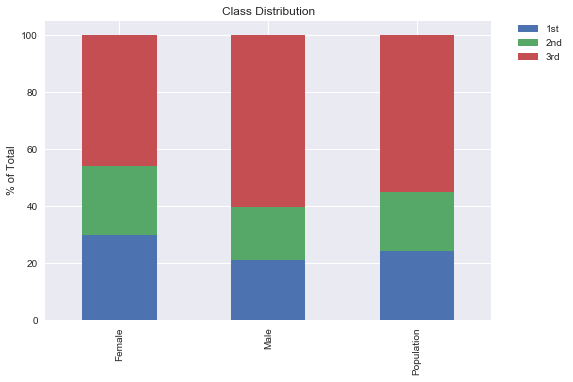

In [4]:
sex_c = freq2_store(titanic['Sex'], 
                    titanic['Pclass'])[1][['1st','2nd', '3rd']]*100
sex_c.index = ['Female','Male', 'Population']

ez_bar(sex_c, 'Class Distribution', '% of Total')

sex_c.transpose()/100

__Figure 1b:__ Frequency table and bar graph showing how each sex and the overall population were spread across the 3 classes on the Titanic. 

_Notes: The majority of both sexes traveled in 3rd class, followed by 1st and then 2nd. The same pattern can be seen in the general population as well. Female passengers were fairly evenly spread across class, with the largest portion in 3rd class (45%). Male passengers were more skewed towards 3rd class. In fact, there were more male passengers in 3rd class than both the 1st and 2nd combined. _

### 1.2 Survival Statistics

,Female,Male,Population
Died,0.257962,0.811092,0.616162
Lived,0.742038,0.188908,0.383838


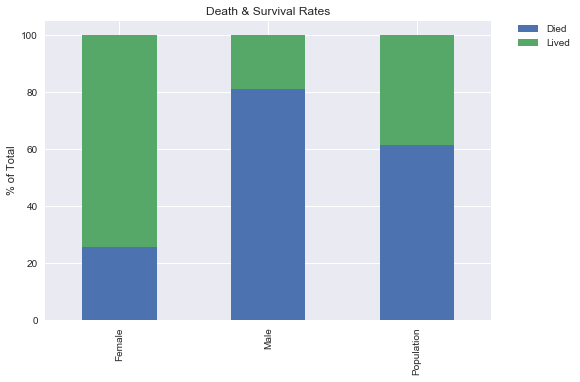

In [5]:
sex_surv = freq2_store(titanic['Survived'],
                       titanic['Sex'])[2].ix[['Died', 'Lived']]*100
sex_surv.columns = ['Female', 'Male', 'Population']

ez_bar(sex_surv.transpose(), 'Death & Survival Rates', '% of Total')

sex_surv/100

__Figure 1c:__ Frequency table & bar graph depicting passenger survival & death rates for both sexes and the overall population.

_Notes: On whole, female passengers (74%) had more than 3x higher survival rates than male passengers (19%). Roughly, 3/4 of female passengers survived aboard the titanic, compared to only 1/5 of male passengers._

,Died,Lived,Population
Female,0.147541,0.681287,0.352413
Male,0.852459,0.318713,0.647587


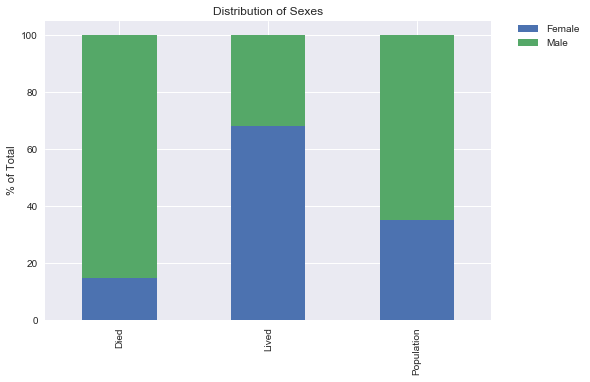

In [6]:
#frq = freq2_store(titanic['Sex'],titanic['Survived'])[2].ix[:-1]

sex_s = freq2_store(titanic['Survived'],
                    titanic['Sex'])[1][['female','male']]*100
sex_s.index = ['Died', 'Lived', 'Population'] 
sex_s.columns = ['Female','Male']

ez_bar(sex_s, 'Distribution of Sexes', '% of Total')

sex_s.transpose()/100

__Figure 1d:__ Frequency table & bar graph depicting the percentage of each sex who died, survived, and traveled aboard the Titanic.

_Notes: Male passengers represented 65% of passengers aboard the Titanic, and only 32% of the survivors.  Female passengers made up 35% of the population, but accounted for 68% of all surviving passengers._

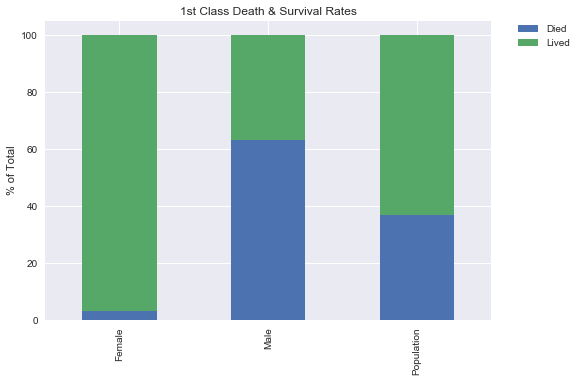

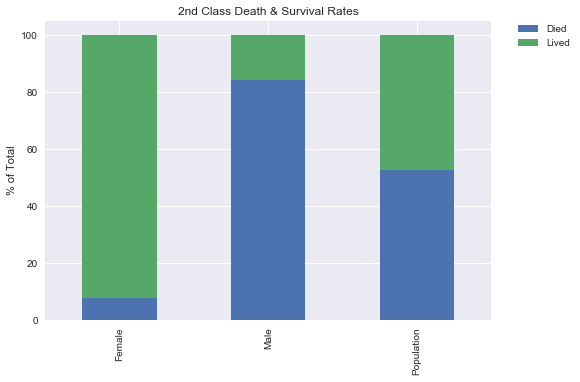

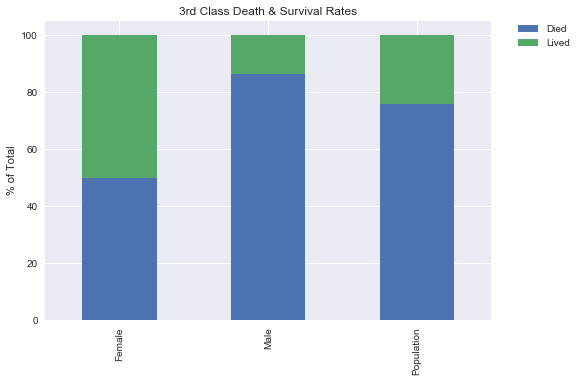

In [7]:
ez_graph1(titanic['Sex'],titanic['Pclass'], titanic['Survived'],'1st', iVals=['Female', 'Male', 'Population'])
ez_graph1(titanic['Sex'],titanic['Pclass'], titanic['Survived'],'2nd', iVals=['Female', 'Male', 'Population'])
ez_graph1(titanic['Sex'],titanic['Pclass'], titanic['Survived'],'3rd', iVals=['Female', 'Male', 'Population'])

<a id='1e'></a>
__Figure 1e:__ Bar graphs depicting survival rates across each class for the sexes and general population. 

_Note: Female passengers had the highest survival rates in each class.  Male passengers faced low survival rates across all classes, however 1st  class male passengers were more than twice as likely to survive compared to those traveling in 2nd or 3rd class.  The data on class survival rates for the female population is also very interesting.  It shows that female passengers located in the 1st  (97%) and 2nd (92%) classes were almost certain to survive, while 3rd class travelers lost 50% of their population. The impact of class on survival will be explored further in [Section 3](#3)._

### 1.3 Summary 

Female passengers were found to have higher survival rates across all measured categorizations of the data. Female passengers were also represented in the surviving group at nearly twice the rate they existed in the general population. This evidence strongly suggests that females were more likely than males to survived. Therefore, the conclusion of this analysis is that sex did play a role in survival aboard the Titanic. 

## 2. Did Passenger Age Impact Survival?

### 2.1 Population Statisics

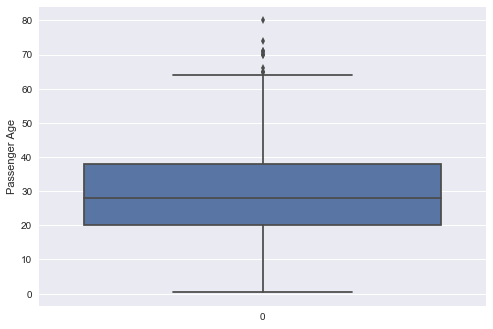

In [8]:
sns.boxplot(data=titanic['Age'])
ylabel('Passenger Age')

__Figure 2a:__ Box & whisker plot of Titanic passenger ages.  

_Notes: The average age of passenger on the titanic was 30. Passenger's ages ranged from just under 6 months to 80 years old._

,Female,Male,Population
Child,0.175159,0.100520,0.126824
Adult,0.656051,0.684575,0.674523
Age Unknown,0.168790,0.214905,0.198653


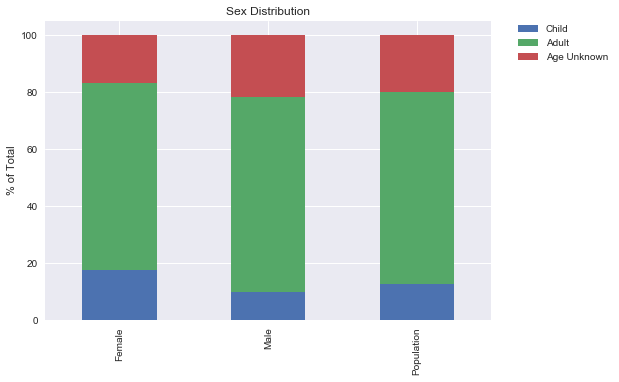

In [9]:
age_sex = freq2_store(titanic['age_group'], 
                      titanic['Sex'])[2].ix[['Child','Adult','Unknown'],['female','male','RowTotals']]*100

age_sex.index = ['Child', 'Adult', 'Age Unknown']
age_sex.columns = ['Female','Male', 'Population']

ez_bar(age_sex.transpose(), 'Sex Distribution', '% of Total')

age_sex/100

__Figure 2b:__ Stacked bar graph depicting the percentage of each age group across the sexes and general population.

_Notes: Adults (18+) made up 67% of the population, children (under 18) made up 13%, and 20% of the passenger's ages were unknown.  We know from the previous section that the majority of adults were male (66%) and that children were split more evenly between females (49%) and males (51%)._


Class Dsitribution


,Child,Adult,Population
1st,0.106195,0.289517,0.242424
2nd,0.203540,0.249584,0.206510
3rd,0.690265,0.460899,0.551066


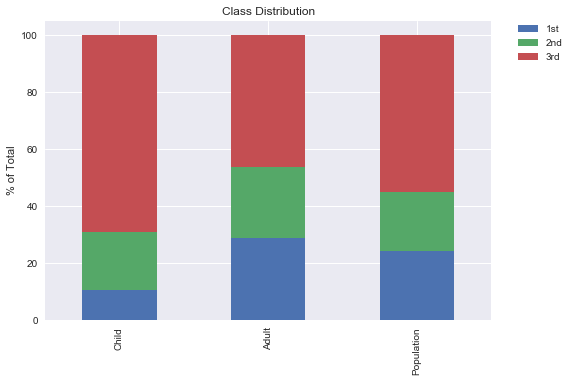

In [10]:
age_cls = freq2_store(titanic['age_group'],
                      titanic['Pclass'])[1].ix[[0,1,3],
                                               ['1st', '2nd', '3rd']]*100
age_cls.index = ['Child', 'Adult', 'Population']

ez_bar(age_cls, 'Class Distribution', '% of Total')

print('Class Dsitribution')

age_cls.transpose()/100

__Figure 2c:__ Frequency table and stacked bar graph depicting the class distribution of each age group and of the overall population.

_Notes: The majority of adults and children traveled in 3rd class. There were more than twice as many children in 3rd class (69%) than in the 1st (11%) and 2nd (20%) classes combined. Adults were distributed across the classes in a pattern similar to the general population, with the majority in 3rd (46%) class followed by 1st (29%) and then 2nd (25%)._

### 2.2 Survival Statistics

In [11]:
age_surv = freq2_store(titanic['Survived'], titanic['age_group'])
pt = age_surv[2].ix[['Died','Lived'],['Child','Adult','RowTotals']]
pt.columns = ['Child', 'Adult', 'Population']
print('Death & Survival Rates')
pt

Death & Survival Rates


,Child,Adult,Population
Died,0.460177,0.618968,0.616162
Lived,0.539823,0.381032,0.383838


In [12]:
ag =age_surv[1][['Child', 'Adult', 'Unknown']].transpose()
ag.columns = ['Died','Lived','Population']
print('Age Group Distributions')
ag

Age Group Distributions


,Died,Lived,Population
Child,0.094718,0.178363,0.126824
Adult,0.677596,0.669591,0.674523
Unknown,0.227687,0.152047,0.198653


__Figure 2d:__ Frequency tables depicting (1) death and survival rates for each age group and (2) distribution of age groups across dead & surviving passengers. Population statistics were added to each table for comparison.

_Notes: On average, children had higher survival rates (54%) than adults (38%). Surviving passengers were made up of 18% children, 67% adults, and 15% of an unknown age. Adults were represented in both the dead and surviving passengers at approximately the same rate as they existed in the general population. (~67%) Children were overrepresented in the surviving group (~5%) and underrepresented in the dead. (~3%)

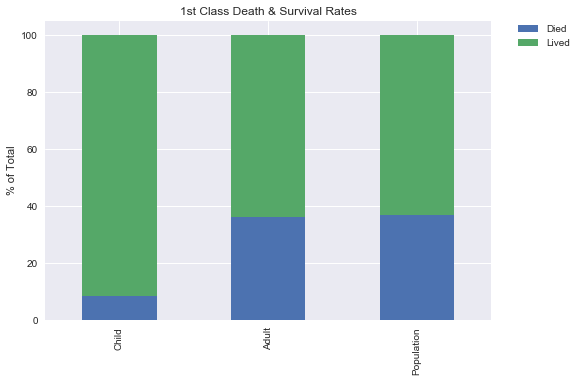

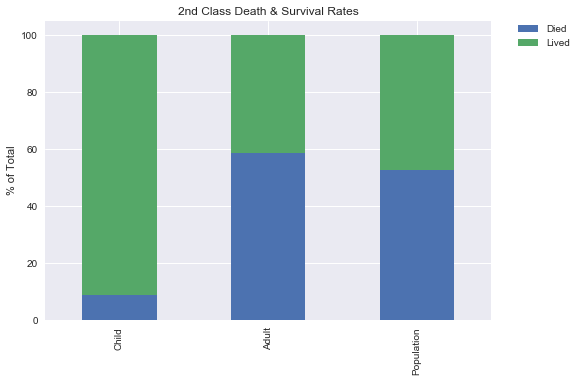

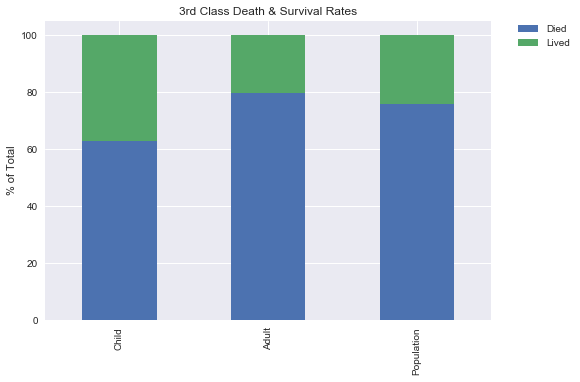

In [13]:
#create tables
tab = freq3_store(titanic['Survived'],titanic['Pclass'], titanic['age_group'])[1]
tot_by_class = freq2_store(titanic['Survived'], titanic['Pclass'])[2].ix[['Died', 'Lived'],['1st', '2nd', '3rd']]
#1st class
tab_1st = tab['1st'].ix[['Died','Lived'],['Child','Adult']]*100
tab_1st.index.name = None
tab_1st.columns.name = None
tab_1st['Population'] = tot_by_class['1st']*100

#2nd class
tab_2nd = tab['2nd'].ix[['Died','Lived'],['Child','Adult']]*100
tab_2nd.index.name = None
tab_2nd.columns.name = None 
tab_2nd['Population'] = tot_by_class['2nd']*100

#3rd class
tab_3rd = tab['3rd'].ix[['Died','Lived'],['Child','Adult']]*100
tab_3rd.index.name = None
tab_3rd.columns.name = None
tab_3rd['Population'] = tot_by_class['3rd']*100

#stacked bar graphs
ez_bar(tab_1st.transpose(), '1st Class Death & Survival Rates', '% of Total')
ez_bar(tab_2nd.transpose(), '2nd Class Death & Survival Rates', '% of Total')
ez_bar(tab_3rd.transpose(), '3rd Class Death & Survival Rates', '% of Total')

__Figure 2e:__ Stacked bar graphs displaying death and survival rates by class for each age group and population.

_Notes: Children had the highest rates of survival in each class. The largest gap in survival statistics between age groups was found in the upper classes, where adults were more than 4 times as likely to die.  The lowest rates of survival for both adults and children existed in 3rd class.  Interestingly, the same pattern emerges for children as seen previously with female passengers.  Children traveling in the upper classes had a ~91% rate of survival, while those traveling in 3rd class experienced a significantly lower survival rate of 37%.  The impact of class will be explored further in section 3._


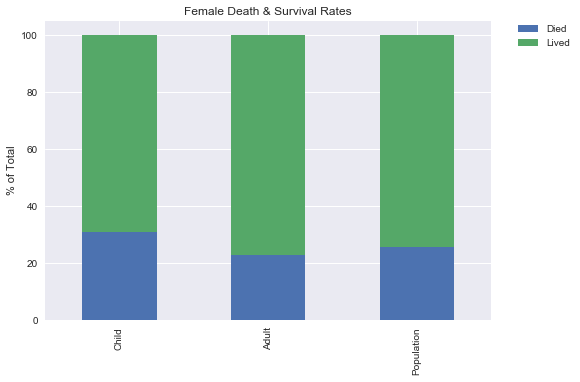

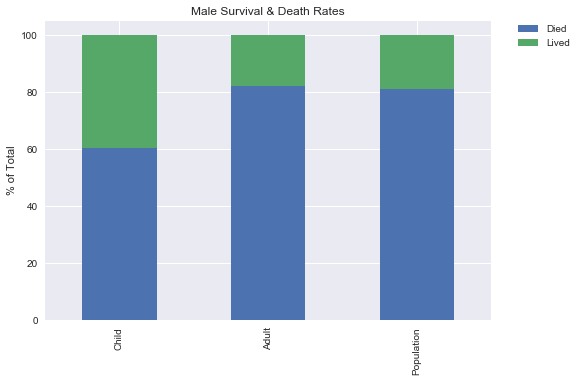

In [14]:
age_sex_surv = freq3_store(titanic['Survived'], 
                           titanic['age_group'], titanic['Sex'])

fem_ch = age_sex_surv[1]['Child'].ix[['Died', 'Lived'], ['female']]
fem_a = age_sex_surv[1]['Adult'].ix[['Died', 'Lived'], ['female']]
fem_total = freq2_store(titanic['Survived'],
                        titanic['Sex'])[2].ix[['Died', 'Lived'], ['female']]

fem_surv = pd.concat([fem_ch, fem_a, fem_total], axis=1)*100
fem_surv.columns = ['Child', 'Adult', 'Population']
fem_surv.index.name = None

ez_bar(fem_surv.transpose(), 'Female Death & Survival Rates', '% of Total')

'----------------------------------------------'

male_ch = age_sex_surv[1]['Child'].ix[['Died', 'Lived'], ['male']]
male_a = age_sex_surv[1]['Adult'].ix[['Died', 'Lived'], ['male']]
male_total = freq2_store(titanic['Survived'],
                        titanic['Sex'])[2].ix[['Died', 'Lived'], ['male']]

mal_surv = pd.concat([male_ch, male_a, male_total], axis=1)*100
mal_surv.columns = ['Child', 'Adult', 'Population']
mal_surv.index.name = None

ez_bar(mal_surv.transpose(), 'Male Survival & Death Rates', '% of Total')

<a id='2f'></a>
__Figure 2f:__ Stacked bar graphs depicting male and female survival rates within each age group.  The survival & death rates for each population have also been included for comparison. 

_Notes: The data on the male population shows that children (40%) had higher survival rates than adults (18%), which is consistent with the previous findings in this analysis. Surprisingly, the data from the female population breaks this trend and provides the first example of adults (77%) with higher survival rates than children (69%).  This will be explored further below. _

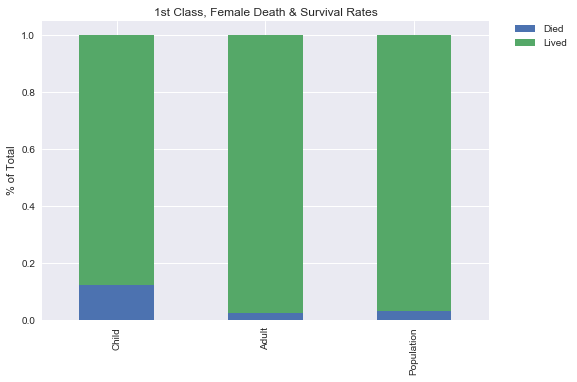

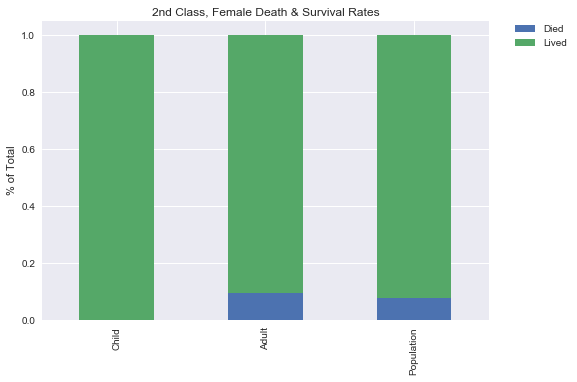

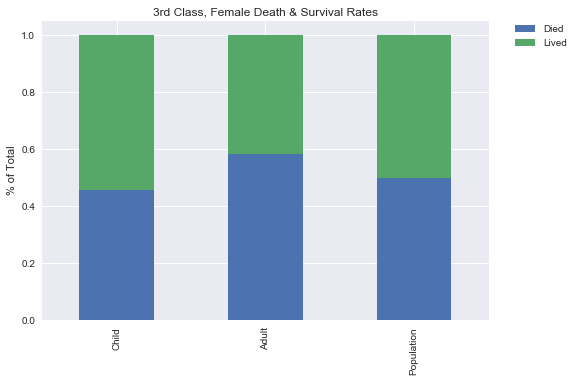

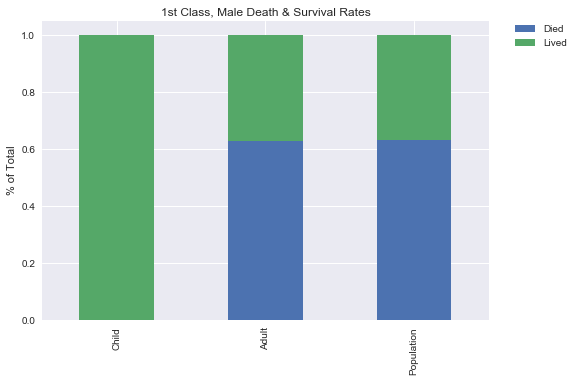

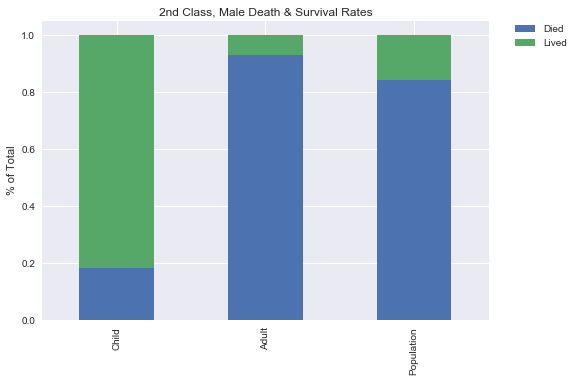

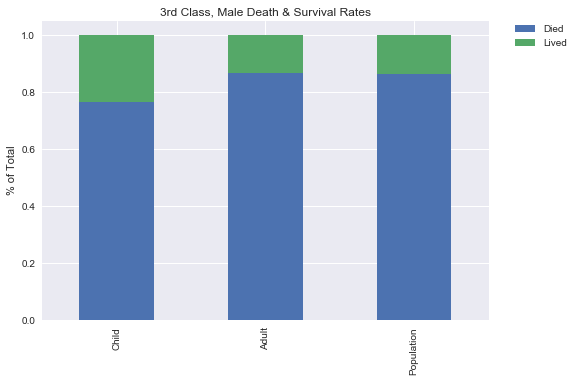

In [15]:
data = freq4_store(titanic['Survived'],titanic['Pclass'],titanic['Sex'], titanic['age_group'])[1]
data_totals = freq3_store(titanic['Survived'], titanic['Pclass'], titanic['Sex'])[1]

for sex in ['female', 'male']:
    for val in ['1st','2nd','3rd']:
        #create data table
        table = data[val][sex].ix[['Died', 'Lived'],['Child', 'Adult']]
        table['Population'] = data_totals[val][sex]
        table.index.name = None
        table.columns.name = None
        table*100
        
        graph = ez_bar(table.transpose(), '{} Class, {} Death & Survival Rates'.format(val.capitalize(), 
                                                                               sex.capitalize()), '% of Total')
        

<a id='2g'></a>
__Figure 2g:__ Bar graphs of death & survival rates for age groups within each class/sex grouping.  The death and survival rates for each class/sex population are also included.

_Note: The data shows children had the highest rates of survival in each sex/class population, with the exception of 1st class, female passengers. Figure 2f revealed that on average, female adults had higher survival rates than female children. However, we now see that this only occurred within the 1st class population._

_The numbers also show that children and adults traveling in 3rd class had the lowest rates of survival, with the exception of adult males. Adult male passengers traveling in 2nd class had lower survival rates than those in 3rd class, which expands on the findings concerning male averages in [Figure 1e](#1e)._



In [16]:
data = freq3_store(titanic['Pclass'],
            titanic['Sex'],titanic['age_group'])

counts = data[0]['female'].ix[['1st', '2nd', '3rd', 'All'], ['Child', 'Adult']]
perc = data[1]['female'].ix[['1st', '2nd', '3rd', 'All'], ['Child', 'Adult']]

perc.columns = ['% of Children', '% of Adults']

table = pd.concat((counts['Child'], perc['% of Children'], counts['Adult'], perc['% of Adults']), axis=1)
table.index.name = None

table

,Child,% of Children,Adult,% of Adults
1st,8,0.145455,77,0.373786
2nd,12,0.218182,62,0.300971
3rd,35,0.636364,67,0.325243
All,55,1.000000,206,1.000000


In [17]:
fem_data = freq4_store(titanic['Pclass'], 
                       titanic['Sex'], titanic['Survived'], 
                       titanic['age_group'])[0]['female']

child = fem_data['Died']['Child']
child_death = child / table['Child']

adult = fem_data['Died']['Adult']
adult_death = adult / table['Adult']

ftable = pd.concat((child, child_death, adult, adult_death), axis=1)
ftable.columns = ['Child Deaths', 'Death Rate', 'Adult Deaths', 'Death Rate']

ftable

,Child Deaths,Death Rate,Adult Deaths,Death Rate
Pclass,,,,
1st,1,0.125000,2,0.025974
2nd,0,0.000000,6,0.096774
3rd,16,0.457143,39,0.582090
All,17,0.309091,47,0.228155


__Figure 2h:__ (1) Frequency table depicting the class distribution of female adults and children.  Values have been listed in counts and as a percent of the total. (2) Frequency table depicting the number of dead passengers and overall death rates of female adults and children in each class.

_Note:_ There were almost 4 times as many female adults as children aboard the Titanic. Adult females in first class outnumbered children at nearly 10 to 1.  This explains the higher adult female survival rates seen in [Figure 2g](#2g). With only 8 total female children in first class, a single death dropped the overall survival rate by 13%. While 2 deaths out of 77 total adults decreased the survival rate by only 3%.

Female adults were spread fairly even across each class, while children were primarily located in 3rd class. Females traveling in 3rd class from both age groups experienced the highest death rates by a wide margin. The numbers show that 67% of the overall survival rate for adult females was calculated based on 1st & 2nd class survival rates (+90%), while 63% of the overall children’s survival rate was calculated on 3rd class survival rates (54%). These differences in population distributions and the lopsided survival rates explain why we saw higher survival rates for adult females in [Figure 2f](#2f)._ 


### 2.3 Summary

On average, passengers under the age of 18 were more likely to survive than adults (18+). Children represented 18% of survivors, while only representing 13% of the population.  Children experienced higher survival rates across each sub-division of the population, with the exception of one.  Upon further examination, the exception can be traced to a small sample size and lurking variable (i.e. class). The conclusion of these findings are that passengers under the age of 18 (i.e. children) were more likely to survive aboard the Titanic.

<a id='3'></a>
## 3. Did Passenger Class Impact Survival?

### 3.1 Population Statistics

In [18]:
tab_class = freq1_store(titanic['Pclass'])[1].ix[['1st','2nd','3rd'], ['Count']]

tab_class.index.name = None

print('\n Titanic Class Distribution')
tab_class


 Titanic Class Distribution


col_0,Count
1st,0.242424
2nd,0.206510
3rd,0.551066


__Figure 3a:__ Frequency table displaying percentage of population located within each class. 

_Note: Passengers aboard the titanic were separated into 3 classes. The majority of passengers traveled in 3rd class (55%) followed by 1st (24%) and 2nd (21%). Previously, we saw that 3rd class also contained the largest proportion of men (60%), women (46%), children (69%) and adults (46%)._

### 3.2 Survival Statistics

,Died,Lived,Population
1st,14.571949,39.766082,24.242424
2nd,17.668488,25.438596,20.650954
3rd,67.759563,34.795322,55.106622


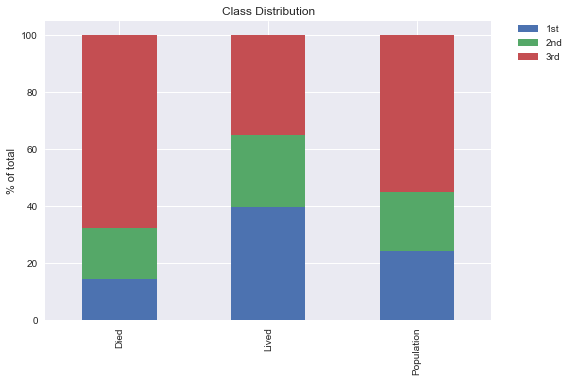

In [19]:
graph_data = (freq2_store(titanic['Survived'],titanic['Pclass'])
              [1][['1st', '2nd', '3rd']])*100

graph_data.index = ['Died', 'Lived', 'Population']

ez_bar(graph_data, 'Class Distribution', '% of total')

graph_data.transpose()

__Figure 3b:__ Frequency table & bar graph showing class distribution within the dead & surviving populations. The class breakdown for the entire population has been included for comparison. 

_Note: The majority of passengers who died aboard the titanic were traveling in 3rd class (68%). When comparing the dead & surviving passenger distributions to the population we see that 3rd class passengers accounted for a larger portion of the dead (+13%) and a smaller portion of the living (-20%). 1st and 2nd class followed the exact opposite pattern, accounting for less of the dead (-9%, -3%) and more of the survivors. (+16%, +4%)_


,1st,2nd,3rd,Population
Died,0.37037,0.527174,0.757637,0.616162
Lived,0.62963,0.472826,0.242363,0.383838


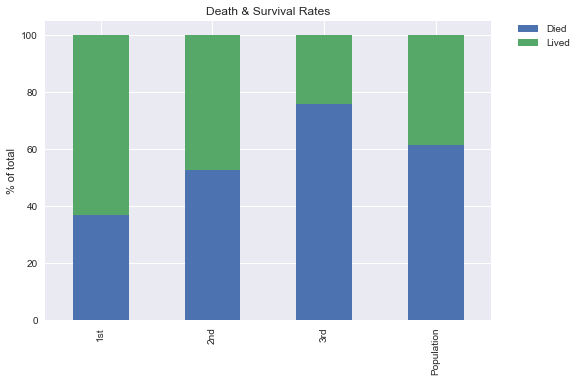

In [20]:
tb = freq2_store(titanic['Pclass'], 
                 titanic['Survived'])[1][['Died','Lived']]*100
tb.index = ['1st', '2nd', '3rd', 'Population']

ez_bar(tb,'Death & Survival Rates', '% of total')

tb.transpose()/100

__Figure 3c:__ Frequency table & bar graph depicting death & survival rates for each class and the overall population.

_Note: Passengers traveling in 1st class were most likely to survive (63%) and passengers traveling 3rd class were least likely to survive (24%). Death rates for 3rd class passengers (76%) were slightly more than double that of 1st class passengers (37%). A familiar trend appears when comparing class rates against the population, 3rd class passengers have lower survival and higher death rates, while 1st and 2nd class passengers experience the opposite._

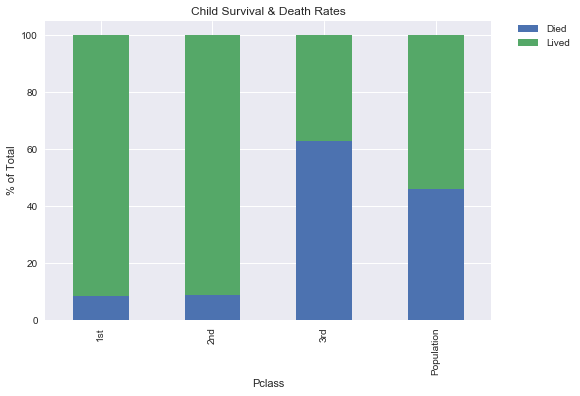

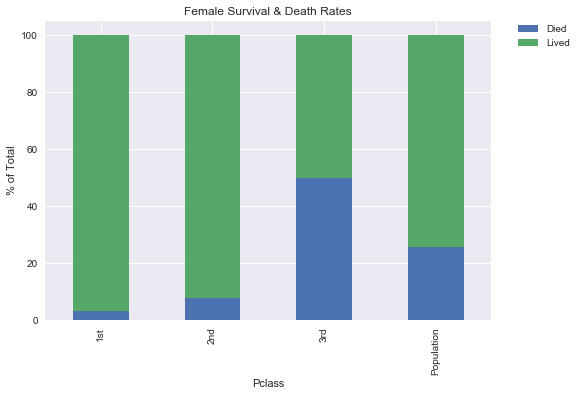

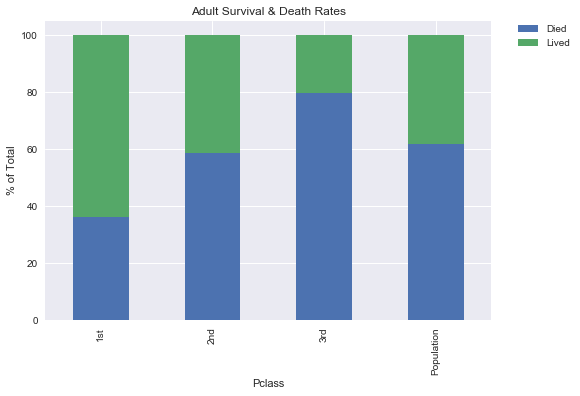

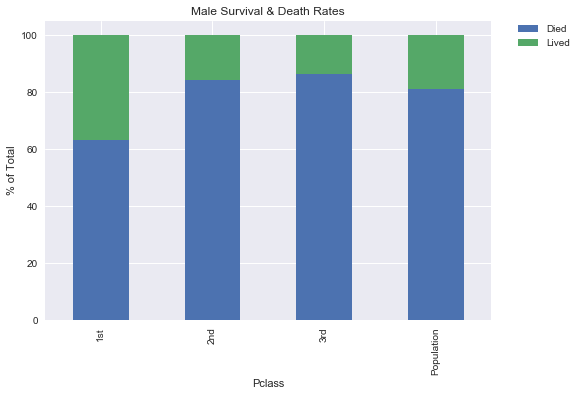

In [21]:
ez_graph3(titanic['Survived'], 
         titanic['age_group'],titanic['Pclass'], 
         'Child', 'Child Survival & Death Rates')

ez_graph3(titanic['Survived'], 
          titanic['Sex'],titanic['Pclass'], 
          'female', 'Female Survival & Death Rates')

ez_graph3(titanic['Survived'], 
         titanic['age_group'],titanic['Pclass'], 
         'Adult', 'Adult Survival & Death Rates')

ez_graph3(titanic['Survived'], 
         titanic['Sex'],titanic['Pclass'], 
         'male', 'Male Survival & Death Rates')




<a id='3d'></a> 
__Figure 3d:__ Bar graphs depicting death and survival rates across classes within each sex and age group. The population rates for each sex and age group were also added for comparison. 

_Note: Again we see that 3rd class passengers experienced the lowest survival rates across each sex and age groups.  The largest imblance is found within children, who survived at rates of 92% (1st) and 91%(2nd) in the upper classes and just 37% in 3rd class.  A similar trend is seen in the female population, with 1st and 2nd class survival rates of 97% & 92%, respectively, compared to only 50% in 3rd class. Adult data followed suit, with survival rates of 64% in 1st class, 41% in 2nd, and 20% in 3rd.  Interestingly, the male passenger data slighty deviated from this pattern. The highest survival rates still belonged to 1st class passengers (37%), however the survival rates for 2nd class (16%) were nearly as low as 3rd class (14%).__  

(            Died     Lived  Population
 Pclass                                
 1st     0.169355  0.484716    0.289517
 2nd     0.236559  0.270742    0.249584
 3rd     0.594086  0.244541    0.460899,
 <matplotlib.legend.Legend at 0x119b88cf8>)

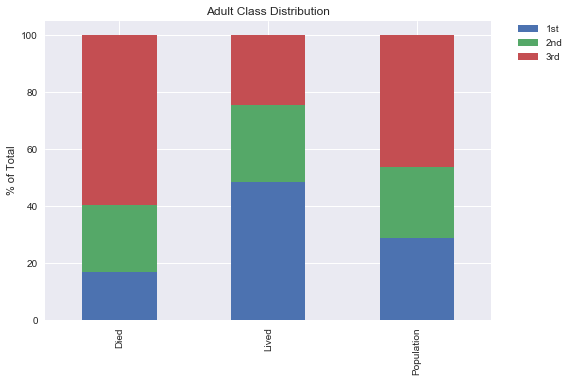

In [22]:
ez_graph2(titanic['Pclass'], 
          titanic['age_group'], titanic['Survived'],
         'Adult', 'Adult Class Distribution')

(            Died     Lived  Population
 Pclass                                
 1st     0.019231  0.180328    0.106195
 2nd     0.038462  0.344262    0.203540
 3rd     0.942308  0.475410    0.690265,
 <matplotlib.legend.Legend at 0x11a0d12e8>)

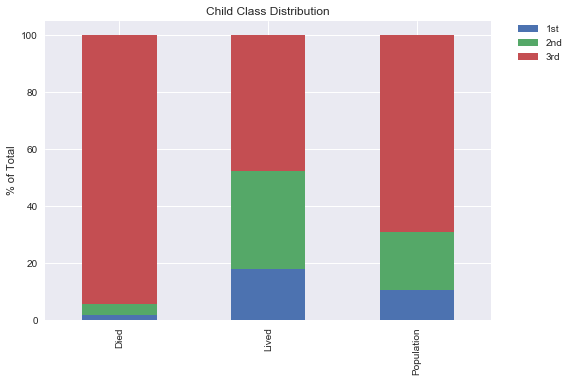

In [23]:
ez_graph2(titanic['Pclass'], 
          titanic['age_group'], titanic['Survived'],
         'Child', 'Child Class Distribution')

(            Died     Lived  Population
 Pclass                                
 1st     0.164530  0.412844    0.211438
 2nd     0.194444  0.155963    0.187175
 3rd     0.641026  0.431193    0.601386,
 <matplotlib.legend.Legend at 0x119dbc320>)

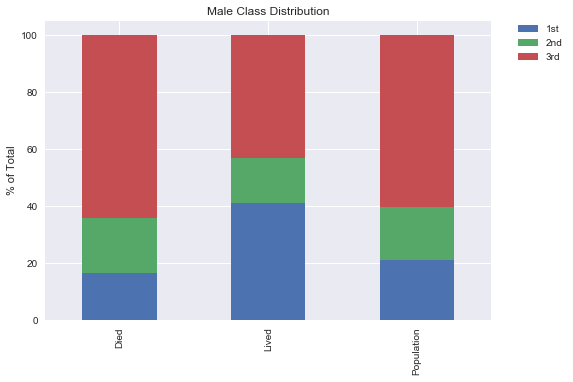

In [24]:
ez_graph2(titanic['Pclass'], 
          titanic['Sex'], titanic['Survived'],
         'male', 'Male Class Distribution')

(            Died     Lived  Population
 Pclass                                
 1st     0.037037  0.390558    0.299363
 2nd     0.074074  0.300429    0.242038
 3rd     0.888889  0.309013    0.458599,
 <matplotlib.legend.Legend at 0x11a5276d8>)

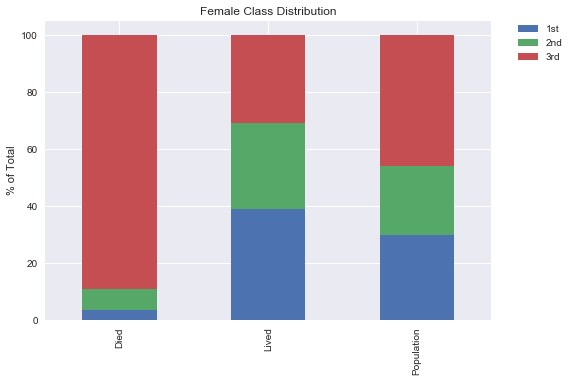

In [25]:
ez_graph2(titanic['Pclass'], 
          titanic['Sex'], titanic['Survived'],
         'female', 'Female Class Distribution')

__Figure 3E:__ Frequency tables & bar graphs depicting the class distribution of passengers who died, survived, and existed within each sex and age group.

_Note: The numbers show the majority of dead passengers from each group were traveling in 3rd class - adults (59%), children (94%), males (64%), females (88%). When comparing these numbers to the population statistics, we see that 3rd class passengers were overrepresented in each case. The most lopsided numbers are found with children, whose 3rd class travelers accounting for 94% of the dead and only 68% of the population._

_The data also shows that 1st class passengers made up the largest portion of surviving adults (48%) and females (39%). In both cases, first class passengers appeared at higher percentages than they did in their respective populations. Men on the other hand had nearly as many 1st (41%) and 3rd (43%) class survivors. However, this is misleading as there were nearly 3 times as many male passengers traveling in 3rd class (60%) as there were in 1st (21%). The majority of surviving children were traveling in 2nd (34%) and 3rd (48%) class, but this too is misleading. In comparison to the rate they appeared in the population, both 1st (+7%) and 2nd (+14%) class survivors were overrepresented, while 3rd class (-21%) survivors were underrepresented. _

In [26]:
#Death & Survival rates by class for each Sex/Age Group

data = freq4_store(titanic['Survived'],titanic['age_group'],titanic['Sex'],titanic['Pclass'])[1]


data_totals = freq3_store(titanic['Survived'], titanic['age_group'], titanic['Sex'])[1]

for sex in ['female', 'male']:
    for val in ['Child', 'Adult']:
        #create data table
        table = data[val][sex].ix[['Died', 'Lived'],['1st', '2nd', '3rd']]
        table['Population'] = data_totals[val][sex]
        table.index.name = None
        table.columns.name = None
        table*100
        
        print ("\n\n {} ({}) Death & Survival Rates \n\n".format(sex.capitalize(),val), table)
    
        
      





 Female (Child) Death & Survival Rates 

          1st  2nd       3rd  Population
Died   0.125  0.0  0.457143    0.309091
Lived  0.875  1.0  0.542857    0.690909


 Female (Adult) Death & Survival Rates 

             1st       2nd      3rd  Population
Died   0.025974  0.096774  0.58209    0.228155
Lived  0.974026  0.903226  0.41791    0.771845


 Male (Child) Death & Survival Rates 

        1st       2nd       3rd  Population
Died   0.0  0.181818  0.767442    0.603448
Lived  1.0  0.818182  0.232558    0.396552


 Male (Adult) Death & Survival Rates 

             1st       2nd       3rd  Population
Died   0.628866  0.931818  0.866667    0.822785
Lived  0.371134  0.068182  0.133333    0.177215


__Figure 3f:__ Frequency table of death & survival rates by class for each sex/age group pairing.  The death and survival rates for each population is also included for comparison.

_Note: The 3rd class passengers from each sex/age grouping experienced higher than average death rates and lower than average survival rates in comparison to their populations.  The 1st class passengers from each of these groups experienced the opposite, with below average death rates and above average survival rates._ 

_Upper class (1st & 2nd) passengers experienced the highest survival rates across each sex/age grouping, with the exception of adult males. This is line with our findings from [Figure 3d](#3d). However, we now see the reason male passengers didn't fit the pattern was due to the high mortality rate of 2nd class, adult males.  In fact, this is the only instance where 3rd class passengers had higher survival rates than 2nd class. The effect of this on the overall male population was partially offset by the children, whose survival rates along class lines matched the trend seen in the other population sub-groups._

In [27]:
#Death/Survival Rates Per Sex/Age Group

data = freq4_store(titanic['Pclass'], titanic['Sex'], titanic['age_group'],titanic['Survived'])[1]

totals = freq3_store(titanic['Pclass'], titanic['Sex'], titanic['age_group'])[1]

for sex in ['female', 'male']:
    for val in ['Child', 'Adult']:
        #create data table
        table = data[sex][val].ix[['1st', '2nd', '3rd']]
        table['Population'] = totals[sex][val]
        table.index.name = None
        table.columns.name = None
        table*100

        print ("\n Class Distribution of {} ({}) Passengers  \n\n".format(sex.capitalize(),val), table)
        


 Class Distribution of Female (Child) Passengers  

          Died     Lived  Population
1st  0.058824  0.184211    0.145455
2nd  0.000000  0.315789    0.218182
3rd  0.941176  0.500000    0.636364

 Class Distribution of Female (Adult) Passengers  

          Died     Lived  Population
1st  0.042553  0.471698    0.373786
2nd  0.127660  0.352201    0.300971
3rd  0.829787  0.176101    0.325243

 Class Distribution of Male (Child) Passengers  

          Died     Lived  Population
1st  0.000000  0.173913    0.068966
2nd  0.057143  0.391304    0.189655
3rd  0.942857  0.434783    0.741379

 Class Distribution of Male (Adult) Passengers  

          Died     Lived  Population
1st  0.187692  0.514286    0.245570
2nd  0.252308  0.085714    0.222785
3rd  0.560000  0.400000    0.531646


__Figure 3G:__ Frequency tables depicting class distribution of the dead and surviving passengers for each sex/age grouping.  The class distribution for each sex/age groups population has also been included for comparison.

_Note:  Passengers from 3rd class represent a larger portion of the dead and smaller portion of the survivors than they do in their respective populations for each of the sex/age groupings. The most dramatic swing is seen in the adult female population, whose 3rd class passengers accounted for 83% of the dead and only 33% of the population.  The data for 1st class passengers in each sex/age group was reversed. They accounted for a smaller percentage of the dead and larger percentage of the survivors than existed in their entire populations.  The largest discrepancy was found in adult males, with 51% of the survivors traveling in 1st class compared to only 25% of the overall population._


### 3.3 Summary

A clear pattern emerged along class lines when analyzing the data set. In nearly every instance, we saw the highest chances of survival existed in 1st class, followed by 2nd, and then 3rd.  We also saw that 1st and 2nd class passengers represented a larger percentage of survivors and a lower percentage of the dead than they did in the population. While the 3rd class passengers experienced the opposite, they were underrepresented in the survivors and overrepresented in the dead compared to their population rates. This data indicates that class played a major role in survival aboard the titanic. The 1st and 2nd classes yielded much higher chances for survival, while traveling in 3rd class resulted in a higher likelihood of death.


# Conclusion

Of the 891 passengers in this dataset, 549 (62%) perished aboard the Titanic. The analysis of this data determined that living and dying was largely dependent on the passengers age, sex, and class.  Passengers who were female, under the age of 18, or traveling in 1st class were much more likely to survive than their counterparts. Adult males and passengers traveling in 3rd class were the least likely to survive aboard the Titanic.  The next step. required for this analysis is to identify if any of these findings are statistically significant.  Any results found to be statistically significant will require further testing/experimentation to assess causation.

<a id='A'></a>
# Appendix A

## Data Preperation (Data Wrangling)
This appendix contains the initial exploration of passenger data from [Kaggle](https://www.kaggle.com/c/titanic/data) and all modifications made to the dataset for this analysis.  Changes to the original dataset have been packaged into the dataworkflow.data module. 

In [28]:
path = '/Users/jco/Desktop/data_science/Udacity/project_2/Titanic/train.csv'

titanic = pd.read_csv(path)

### Explore Data

__Dimension/Type__

In [29]:
titanic.shape

(891, 12)

In [30]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


__Sample__

In [31]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


__Summary Stats__

In [32]:
#Numerical Summary
titanic.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
#Categorical Summary
cat_data = titanic.dtypes[titanic.dtypes == 'object'].index

titanic[cat_data].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Saad, Mr. Khalil",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


### Evaluate Variables

__PassangerID__

* Full set of data (891)
* Unique numerical values for every passenger
* Does not appear relevant for analysis 

_Decision_: __Delete__

In [34]:
titanic['PassengerId'].describe()

count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64

__Survived__

* Full set of data (891)
* Categorical values stored as numbers - 1(lived), 0(Died)
* Key field for analysis

Decision: __Modify__ convert to category, replace nums with text (Died, Lived)

In [35]:
titanic['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

__Pclass__

* Full set of data
* Categorical Data stored as numerical 1=1st Class, 2=2nd Class, 3=3rd Class
* Interesting variable for analysis

Decision: __Modify__ convert to ordered category, replace nums with text (1st, 2nd, 3rd)

In [36]:
titanic['Pclass'].describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

__Name__

* No missing values
* All unique 
* Seperate variables exist for identifying passangers w/ family members
* Does not appear relevant for analysis 

Decision: __Delete__

In [37]:
titanic['Name'].describe()

count                  891
unique                 891
top       Saad, Mr. Khalil
freq                     1
Name: Name, dtype: object

__Sex__

* No missing values
* Stored as object vs. category
* Interesting variable for analysis

Decision: __Modify__ keep values, convert dtype to category

In [38]:
titanic['Sex'].describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [39]:
titanic['Sex'].dtype

dtype('O')

__Age__

* Missing data (177, 714/891)
* Contains estimates for ages under 1 
* interesting var, can also be used to create alternate interesting vars

Decision: __Transform__ keep current vals, keep missing data empyt for now, Create new variable for Child, Adults(>18), and Unknown 

In [40]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

__SibSp__

* Variable for # of sibling or spouses aboard
* No missing values
* Would be interesting to use for identification of passengers with family

Decision: __Merge__ combine with Parch to create new variables identifying passengers traveling with family and how many

In [41]:
titanic['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

__Parch__

* variable for # of parents or childeren aboard
* no missing values
* Would be interesting to use for identification of passengers w/ fam

Decision: __Merge__ combine with SibSp to create new var identifying passengers w/ fam & count

In [42]:
titanic['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

__Ticket__

* No missing values
* Mix of unique and duplicates (681 uni, 310 dupes)
* Mix of alphanumeric and numeric values
* Does not appear relevant for analysis 

Decision: __Delete__

In [43]:
titanic['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [44]:
titanic['Ticket'].head(15)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
Name: Ticket, dtype: object

__Fare__

* No missing values 
* Relevent for analysis 

Decision: __Keep__

In [45]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

__Cabin__

* Missing large number of values (687, 204/891)
* Mix of unique(147) and duplicated(57) data
* Appears to be too little data for analysis

Decision: __Delete__

In [46]:
titanic['Cabin'].describe()

count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object

In [47]:
titanic['Cabin'].head(15)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

__Embarked__

* Missing 2 values
* Categorical stored as Object
* Useful for analysis

Decision: __Modify__ keep values, update dtype to category

In [48]:
titanic['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [49]:
titanic['Embarked'].dtype

dtype('O')

### Update/Add Variables

__Numerical Category Data__

In [50]:
#Survived
new_survived = pd.Categorical(titanic['Survived'])
new_survived = new_survived.rename_categories(['Died', 'Lived'])

new_survived.describe()

,counts,freqs
categories,,
Died,549,0.616162
Lived,342,0.383838


In [51]:
#Pclass
new_pclass = pd.Categorical(titanic['Pclass'], ordered=True)
new_pclass = new_pclass.rename_categories(['1st','2nd','3rd'])

new_pclass.describe()

,counts,freqs
categories,,
1st,216,0.242424
2nd,184,0.206510
3rd,491,0.551066


In [52]:
#Replace with categorical data
titanic['Survived'] = new_survived
titanic['Pclass'] = new_pclass

#sanity check
print (titanic['Survived'].dtype, titanic['Pclass'].dtype)

category category


__Update dtype__

In [53]:
titanic['Sex'] = pd.Series(titanic['Sex'], dtype='category')
titanic['Embarked'] = pd.Series(titanic['Embarked'], dtype='category')

#sanity check
print(titanic['Sex'].dtype, titanic['Embarked'].dtype)

category category


In [54]:
titanic['Sex'].unique()
titanic['Sex'].cat.categories

Index(['female', 'male'], dtype='object')

__Create New Variables__

In [55]:
#Family Count
titanic['FamilyTot'] = titanic['SibSp'] + titanic['Parch']

In [56]:
#Single or Family Variable
bins = [-1,0,np.inf]
labels = ['Single','Family']
fam_status = pd.cut(titanic['FamilyTot'], bins, labels=labels)

fam_status.describe() #sanity check

count        891
unique         2
top       Single
freq         537
Name: FamilyTot, dtype: object

In [57]:
#Add FamStatus
titanic['FamStatus'] = fam_status

In [58]:
#Adult (>18) or Child (<18) Var
bins = [0, 17, 1000, np.inf]
labels = ['Child', 'Adult', 'Unknown']
age_groups = pd.cut(titanic['Age'], bins, labels=labels) 

age_groups.describe() #sanity check

count       714
unique        2
top       Adult
freq        601
Name: Age, dtype: object

In [59]:
#Add age_groups
titanic['age_group'] = age_groups

In [60]:
titanic.head() #sanity check

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyTot,FamStatus,age_group
0,1,Died,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Family,Adult
1,2,Lived,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,Family,Adult
2,3,Lived,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Single,Adult
3,4,Lived,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,Family,Adult
4,5,Died,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,Single,Adult


### Delete Variables

In [61]:
# Remove PassengerId, Name, Ticket, Cabin

titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [62]:
titanic.head() #sanity

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyTot,FamStatus,age_group
0,Died,3rd,male,22.0,1,0,7.2500,S,1,Family,Adult
1,Lived,1st,female,38.0,1,0,71.2833,C,1,Family,Adult
2,Lived,3rd,female,26.0,0,0,7.9250,S,0,Single,Adult
3,Lived,1st,female,35.0,1,0,53.1000,S,1,Family,Adult
4,Died,3rd,male,35.0,0,0,8.0500,S,0,Single,Adult


<a id='B'></a>
# Appendix B

## Exploration of Data Relationships
This appendix contains the exploration of relationships between different variables.  The majority of the analysis was centered on the search for correlations to death and/or survival.
The dataworkflow.visualize module contains the majority of the functions used in this section for manipulating and displaying the data.

The majority of functions used for manipulating and displaying data in this analysis were created in the dataworkflow.visualize module. 

In [63]:
titanic = get_data()

In [64]:
titanic.head(10) #sanity

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilyTot,FamStatus,age_group
0,Died,3rd,male,22.0,1,0,7.2500,S,1,Family,Adult
1,Lived,1st,female,38.0,1,0,71.2833,C,1,Family,Adult
2,Lived,3rd,female,26.0,0,0,7.9250,S,0,Single,Adult
3,Lived,1st,female,35.0,1,0,53.1000,S,1,Family,Adult
4,Died,3rd,male,35.0,0,0,8.0500,S,0,Single,Adult
5,Died,3rd,male,NaN,0,0,8.4583,Q,0,Single,Unknown
6,Died,1st,male,54.0,0,0,51.8625,S,0,Single,Adult
7,Died,3rd,male,2.0,3,1,21.0750,S,4,Family,Child
8,Lived,3rd,female,27.0,0,2,11.1333,S,2,Family,Adult
9,Lived,2nd,female,14.0,1,0,30.0708,C,1,Family,Child


### Summary of Findings

__Survival__
* Majority of passengers died (62%)

__Sex v. Survival__
* Majority of dead were male (85%) | Male = 65% pop
* Majority of survivers were female (68%) | Female = 35% pop
* 74% of Females survived vs. 19% of Males

__Age_Group v. Survival__
* Majority of dead and surviving pass were adults (68%, 67%) | adults = 67% of pop
* Fairly high death rates among each group - Child(46%), Adult(62%), Unknown(71%)
* Survival | Pop Rates
 * Child (54%) | (13%)
 * Adult (38%) | (67%)
 * Unknown (29%) | (20%)

__Class v. Survival__
* Class breakdown
 * 1st (24%), 2nd (21%), 3rd (55%)
* Class survival rates
 * 1st (63%), 2nd (47%), 3rd (24%)
* Surviving passanger class
 * 1st (40%), 2nd (25%), 3rd (35%) 
* 3rd class accounted for 68% of the dead while only making up 55% of the total pop
* 3rd class had the highest mortality rate, almost double that of 1st

__FamilyStatus v. Survival__
* Family (40%) vs. Single (60%)
* 51% survival rate w/family vs. 30% Single
* 68% of dead passangers were traveling alone

__Port v. Survival__
* % by port
 * Cherbourg (19%), Queenstown (9%), Southhampton (72%)
* Port Death Rate
 * Cherbourg (45%), Queenstown (61%), Southhampton (66%)
* The majority of those who lived (64%) and died(77%) hailed from Southhampton
* 27% of survived were from Cherbourg v. 19% of pop

__Fare v. Survival__
* Mean Fare (Survivers | Dead)
  * \$48.39 | \$22.12
* Median Fare (Survivers | Dead)
  * \$26 | \$10.50 
* Much larger variation in surviving fares (Survivers | Dead)
  * std = \$66.60 | \$31.39

__Class & Sex v. Survival__
* Female 
  * Death Rate
    * 1st (3%), 2nd (8%), 3rd (50%)
  * Survival's Class | pop%
    * 1st - 39% | 29%
    * 2nd - 30% | 24%
    * 3rd - 31% | 46%
 * 89% (72/81) of dead Females came from 3rd class
* Male 
  * Death Rate
    * 1st (63%), 2nd (84%), 3rd (86%)
  * Survival's Class | pop%
    * 1st - 41% | 21% 
    * 2nd - 16% | 19%
    * 3rd - 43% | 60%
 * 64% (300/468) of dead males came from 3rd class
 * Apprx. the same amount of men lived from 1st class (45) as 3rd (47)

__AgeGroup & Sex v. Survival__
* Adult
  * Female survival (77%) v. Male survival (18%)
  * 58% of dead females | 66% of female pop
  * 69% of dead males   | 68% of male pop
* Child 
  * Female survival (69%) v. Male survival (40%)
  * 21% of dead females | 18% of female pop
  * 8% of dead males    | 10% of male pop
* Unknown
  * Female Survival (68%) v. Male survival (13%) 
  * 21% of dead females | 17% of female pop 
  * 23% of dead males   | 22% of male pop
  
__Class & AgeGroup v. Survival__
* Adult
  *  Death
    * Rates: 1st (36%) | 2nd (59%) | 3rd (80%)
    * 59% (221/372) of dead adults were from 3rd class
  * Surviver's class | Total pop%
    * 1st 49% | 29%
    * 2nd 27% | 25%
    * 3rd 24% | 46%
* Child
  * Death 
    * Rates: 1st (8%), 2nd (9%), 3rd (63%)
    * 94% (49/52) of dead childeren were from 3rd class
  * Surviver's Class | Total Pop%
    * 1st 18% | 11%
    * 2nd 34% | 20%
    * 3rd 48% | 69%
  * 94% of dead children were from 3rd class  
* Unknown
  * Death
    * Rates: 1st (53%), 2nd (64%), 3rd (75%) 
    * 82% of dead unknown age_groups were from 3rd class
  * Surviver's Class | Total Pop%
    * 1st 27% | 17% 
    * 2nd 8%  | 6%
    * 3rd 65% | 77%

__Class, AgeGroup, Sex v. Survival__
* Death
  * Adult Female | Male
    * Rates: 1st (3%|63%), 2nd (10%|93%), 3rd (58%|87%)
    * 93% (39/42) of dead female adults came from 3rd class | 33% of adult females were from 3rd class
    * 56% of dead male adults were 3rd class   | 53% of adult males were 3rd class
  * Child Female | Male
    * Rates: 1st (13%|0%), 2nd (0%|18%), 3rd (46%|77%)
    * 94% (16/17) of dead female children were 3rd class | 64% of female children were 3rd class
    * 94% (33/35) of dead male children were 3rd class   | 74% of male children were 3rd class
  * Unknown  Female | Male
    * Rates: 1st (0%|76%), 2nd (0|78%), 3rd (40%|90%)
    * 100% of dead females of unknown age were 3rd class | 58% of females of unknown age were 3rd class
    * 79% of dead males of unknown age were 3rd class    | 76% of males of unknown age were 3rd class
* Survival 
  * Breakdown (1% rounding error)
    * Adults  
     * 1st Class Female | Male: 22% | 10%
     * 2nd Class Female | Male: 16% |  2%
     * 3rd Class Female | Male:  8% |  8%
   * Child
     * 1st Class Female | Male:  2% |  1%
     * 2nd Class Female | Male:  4% |  3%
     * 3rd Class Female | Male:  6% |  3%
   * Unknown
     * 1st Class Female | Male:  3% |  1%
     * 2nd Class Female | Male:  1% |  1%
     * 3rd Class Female | Male:  7% |  3%
    

### Data Analysis

In [65]:
titanic['Survived'].describe()

count      891
unique       2
top       Died
freq       549
Name: Survived, dtype: object

In [66]:
titanic['Survived'].unique()

[Died, Lived]
Categories (2, object): [Died, Lived]

In [67]:
freq1_display(titanic['Survived'])


-------------Counts------
 col_0     Count  All
Survived            
Died        549  549
Lived       342  342
All         891  891

--------%Total-----------
 col_0        Count       All
Survived                    
Died      0.616162  0.616162
Lived     0.383838  0.383838
All       1.000000  1.000000


_Survived by Sex__


-------Counts-------
            female  male  RowTotals
Died           81   468        549
Lived         233   109        342
ColTotals     314   577        891

-------Row%--------
              female      male  RowTotals
Died       0.147541  0.852459        1.0
Lived      0.681287  0.318713        1.0
ColTotals  0.352413  0.647587        1.0

-------Col%---------

              female      male  RowTotals
Died       0.257962  0.811092   0.616162
Lived      0.742038  0.188908   0.383838
ColTotals  1.000000  1.000000   1.000000

------Stacked Bar Graph------
 Axes(0.125,0.125;0.775x0.755)


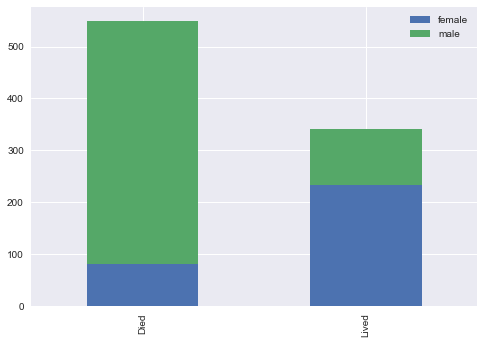

In [68]:
freq2_display(titanic['Survived'], titanic['Sex'])

_Sex & Class_


-------Counts-------
            1st  2nd  3rd  RowTotals
female      94   76  144        314
male       122  108  347        577
ColTotals  216  184  491        891

-------Row%--------
                 1st       2nd       3rd  RowTotals
female     0.299363  0.242038  0.458599        1.0
male       0.211438  0.187175  0.601386        1.0
ColTotals  0.242424  0.206510  0.551066        1.0

-------Col%---------

                 1st       2nd       3rd  RowTotals
female     0.435185  0.413043  0.293279   0.352413
male       0.564815  0.586957  0.706721   0.647587
ColTotals  1.000000  1.000000  1.000000   1.000000

------Stacked Bar Graph------
 Axes(0.125,0.125;0.775x0.755)


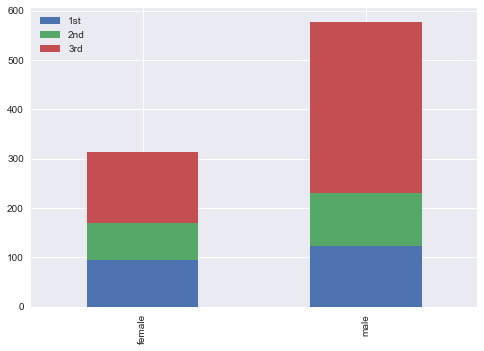

In [69]:
freq2_display(titanic['Sex'], titanic['Pclass'])

_Sex & Age Group_


-------Counts-------
            Child  Adult  Unknown  RowTotals
female        55    206       53        314
male          58    395      124        577
ColTotals    113    601      177        891

-------Row%--------
               Child     Adult   Unknown  RowTotals
female     0.175159  0.656051  0.168790        1.0
male       0.100520  0.684575  0.214905        1.0
ColTotals  0.126824  0.674523  0.198653        1.0

-------Col%---------

               Child     Adult   Unknown  RowTotals
female     0.486726  0.342762  0.299435   0.352413
male       0.513274  0.657238  0.700565   0.647587
ColTotals  1.000000  1.000000  1.000000   1.000000

------Stacked Bar Graph------
 Axes(0.125,0.125;0.775x0.755)


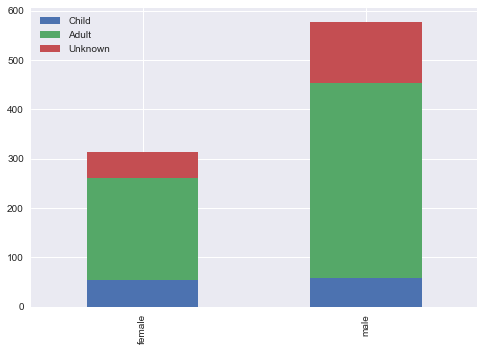

In [70]:
freq2_display(titanic['Sex'], titanic['age_group'])

_Survived by AgeGroup_


-------Counts-------
            Child  Adult  Unknown  RowTotals
Died          52    372      125        549
Lived         61    229       52        342
ColTotals    113    601      177        891

-------Row%--------
               Child     Adult   Unknown  RowTotals
Died       0.094718  0.677596  0.227687        1.0
Lived      0.178363  0.669591  0.152047        1.0
ColTotals  0.126824  0.674523  0.198653        1.0

-------Col%---------

               Child     Adult   Unknown  RowTotals
Died       0.460177  0.618968  0.706215   0.616162
Lived      0.539823  0.381032  0.293785   0.383838
ColTotals  1.000000  1.000000  1.000000   1.000000

------Stacked Bar Graph------
 Axes(0.125,0.125;0.775x0.755)


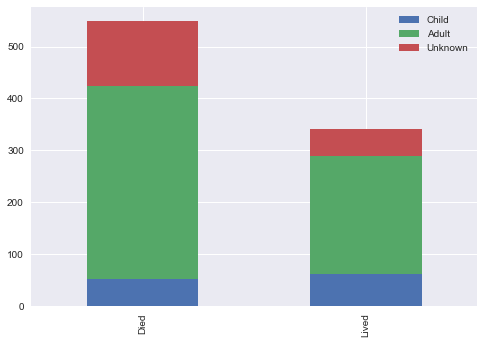

In [71]:
freq2_display(titanic['Survived'], titanic['age_group'])

_Class & Age Group_


-------Counts-------
            Child  Adult  Unknown  RowTotals
1st           12    174       30        216
2nd           23    150       11        184
3rd           78    277      136        491
ColTotals    113    601      177        891

-------Row%--------
               Child     Adult   Unknown  RowTotals
1st        0.055556  0.805556  0.138889        1.0
2nd        0.125000  0.815217  0.059783        1.0
3rd        0.158859  0.564155  0.276986        1.0
ColTotals  0.126824  0.674523  0.198653        1.0

-------Col%---------

               Child     Adult   Unknown  RowTotals
1st        0.106195  0.289517  0.169492   0.242424
2nd        0.203540  0.249584  0.062147   0.206510
3rd        0.690265  0.460899  0.768362   0.551066
ColTotals  1.000000  1.000000  1.000000   1.000000

------Stacked Bar Graph------
 Axes(0.125,0.125;0.775x0.755)


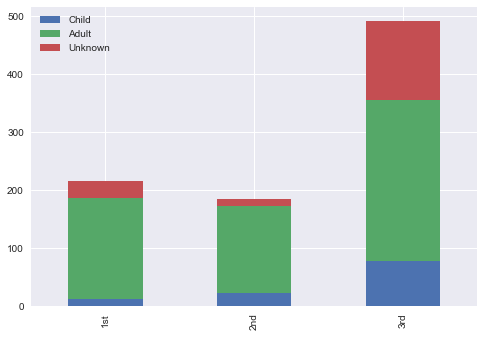

In [72]:
freq2_display(titanic['Pclass'], titanic['age_group'])

_Survived by Age_

In [73]:
lived_age = titanic['Age'][titanic['Survived'] == 'Lived'].reset_index(drop=True)
died_age = titanic['Age'][titanic['Survived'] == 'Died'].reset_index(drop=True)

print('--------Lived------\n', lived_age.describe(), end='\n\n')
print('--------Died--------\n',died_age.describe())

--------Lived------
 count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

--------Died--------
 count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64


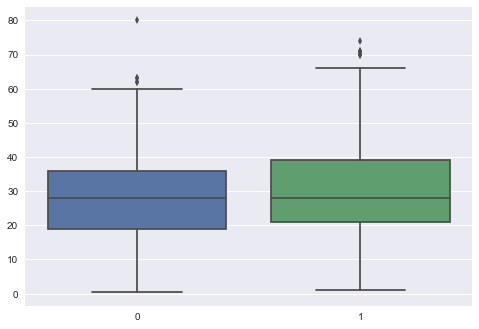

In [74]:
sns.boxplot(data=[lived_age, died_age])

__Survival by Class_


-------Counts-------
            1st  2nd  3rd  RowTotals
Died        80   97  372        549
Lived      136   87  119        342
ColTotals  216  184  491        891

-------Row%--------
                 1st       2nd       3rd  RowTotals
Died       0.145719  0.176685  0.677596        1.0
Lived      0.397661  0.254386  0.347953        1.0
ColTotals  0.242424  0.206510  0.551066        1.0

-------Col%---------

                1st       2nd       3rd  RowTotals
Died       0.37037  0.527174  0.757637   0.616162
Lived      0.62963  0.472826  0.242363   0.383838
ColTotals  1.00000  1.000000  1.000000   1.000000

------Stacked Bar Graph------
 Axes(0.125,0.125;0.775x0.755)


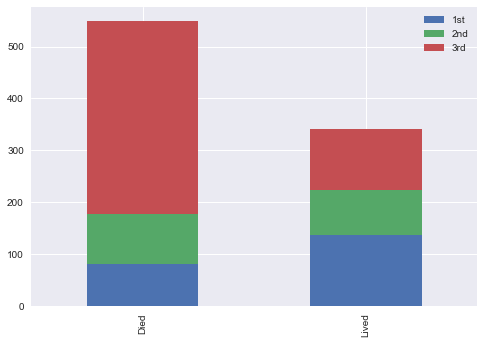

In [75]:
freq2_display(titanic['Survived'], titanic['Pclass'])

_Survival by FamilyStatus_


-------Counts-------
            Single  Family  RowTotals
Died          374     175        549
Lived         163     179        342
ColTotals     537     354        891

-------Row%--------
              Single    Family  RowTotals
Died       0.681239  0.318761        1.0
Lived      0.476608  0.523392        1.0
ColTotals  0.602694  0.397306        1.0

-------Col%---------

              Single   Family  RowTotals
Died       0.696462  0.49435   0.616162
Lived      0.303538  0.50565   0.383838
ColTotals  1.000000  1.00000   1.000000

------Stacked Bar Graph------
 Axes(0.125,0.125;0.775x0.755)


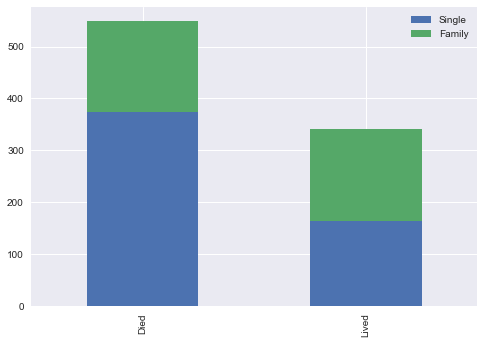

In [76]:
freq2_display(titanic['Survived'], titanic['FamStatus'])

_Survival by Port_


-------Counts-------
              C   Q    S  RowTotals
Died        75  47  427        549
Lived       93  30  217        340
ColTotals  168  77  644        889

-------Row%--------
                   C         Q         S  RowTotals
Died       0.136612  0.085610  0.777778        1.0
Lived      0.273529  0.088235  0.638235        1.0
ColTotals  0.188976  0.086614  0.724409        1.0

-------Col%---------

                   C        Q         S  RowTotals
Died       0.446429  0.61039  0.663043   0.617548
Lived      0.553571  0.38961  0.336957   0.382452
ColTotals  1.000000  1.00000  1.000000   1.000000

------Stacked Bar Graph------
 Axes(0.125,0.125;0.775x0.755)


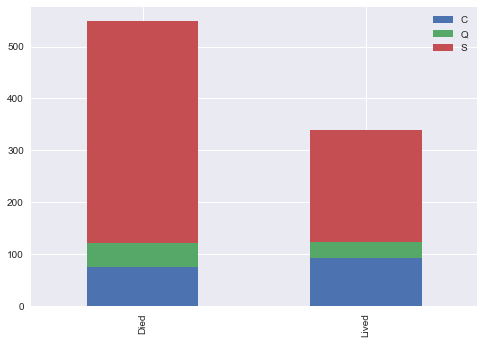

In [77]:
freq2_display(titanic['Survived'], titanic['Embarked'])

_Survival by Fare_

In [78]:
lived_fares = titanic['Fare'][titanic['Survived']=='Lived'].reset_index(drop=True)
died_fares = titanic['Fare'][titanic['Survived']=='Died'].reset_index(drop=True)

print('\n--------------Lived-----------\n', lived_fares.describe())
print('\n--------------Died-------------\n', died_fares.describe())


--------------Lived-----------
 count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

--------------Died-------------
 count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64


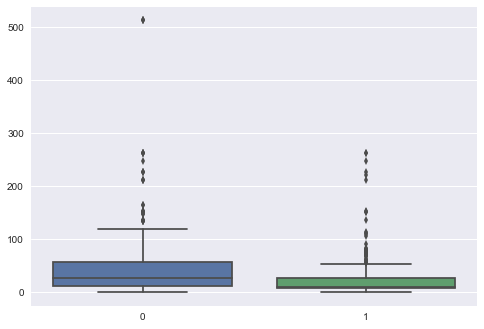

In [79]:
sns.boxplot(data=[lived_fares, died_fares])

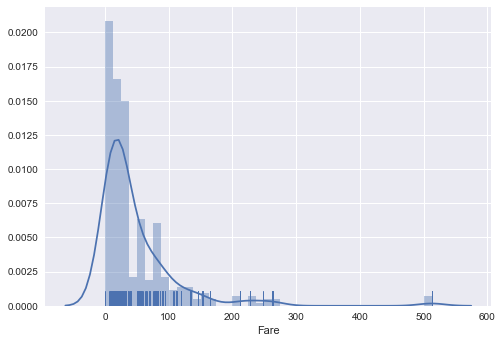

In [80]:
sns.distplot(lived_fares, rug=True)

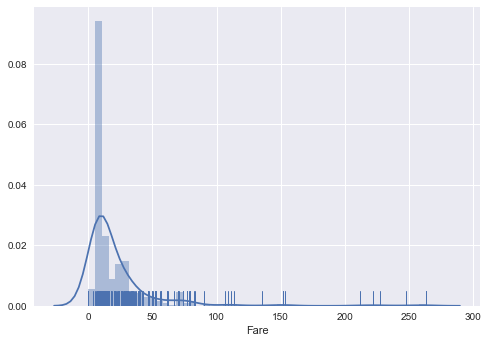

In [81]:
sns.distplot(died_fares, rug=True)

_Survival by Class & Sex_

In [82]:
freq3_display(titanic['Survived'],titanic['Pclass'],titanic['Sex'])


------------Counts----------
 Pclass      1st         2nd         3rd       All
Sex      female male female male female male     
Survived                                         
Died          3   77      6   91     72  300  549
Lived        91   45     70   17     72   47  342
All          94  122     76  108    144  347  891

-----------Col%--------------
 Pclass         1st                 2nd              3rd                 All
Sex         female      male    female      male female      male          
Survived                                                                   
Died      0.031915  0.631148  0.078947  0.842593    0.5  0.864553  0.616162
Lived     0.968085  0.368852  0.921053  0.157407    0.5  0.135447  0.383838
All       1.000000  1.000000  1.000000  1.000000    1.0  1.000000  1.000000


_Survival by AgeGroup & Sex_

In [83]:
freq3_display(titanic['Survived'], titanic['age_group'], titanic['Sex'])


------------Counts----------
 age_group  Child       Adult      Unknown       All
Sex       female male female male  female male     
Survived                                           
Died          17   35     47  325      17  108  549
Lived         38   23    159   70      36   16  342
All           55   58    206  395      53  124  891

-----------Col%--------------
 age_group     Child               Adult             Unknown            \
Sex          female      male    female      male    female      male   
Survived                                                                
Died       0.309091  0.603448  0.228155  0.822785  0.320755  0.870968   
Lived      0.690909  0.396552  0.771845  0.177215  0.679245  0.129032   
All        1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

age_group       All  
Sex                  
Survived             
Died       0.616162  
Lived      0.383838  
All        1.000000  


_Survival by Class & AgeGroup_

In [84]:
freq3_display(titanic['Survived'], titanic['Pclass'], titanic['age_group'])


------------Counts----------
 Pclass      1st                 2nd                 3rd                All
age_group Child Adult Unknown Child Adult Unknown Child Adult Unknown     
Survived                                                                  
Died          1    63      16     2    88       7    49   221     102  549
Lived        11   111      14    21    62       4    29    56      34  342
All          12   174      30    23   150      11    78   277     136  891

-----------Col%--------------
 Pclass          1st                           2nd                      \
age_group     Child     Adult   Unknown     Child     Adult   Unknown   
Survived                                                                
Died       0.083333  0.362069  0.533333  0.086957  0.586667  0.636364   
Lived      0.916667  0.637931  0.466667  0.913043  0.413333  0.363636   
All        1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   

Pclass          3rd                         All 

_Survival by Class, Sex, AgeGroup_

In [85]:
freq4_display(titanic['Survived'],titanic['Pclass'],titanic['age_group'],titanic['Sex'])


----------Counts---------

 Pclass       1st                                  2nd                   \
age_group  Child       Adult      Unknown       Child       Adult        
Sex       female male female male  female male female male female male   
Survived                                                                 
Died           1    0      2   61       0   16      0    2      6   82   
Lived          7    4     75   36       9    5     12    9     56    6   
All            8    4     77   97       9   21     12   11     62   88   

Pclass                    3rd                                All  
age_group Unknown       Child       Adult      Unknown            
Sex        female male female male female male  female male       
Survived                                                          
Died            0    7     16   33     39  182      17   85  549  
Lived           2    2     19   10     28   28      25    9  342  
All             2    9     35   43     67  210    

In [86]:
surv_class_sex_age = freq4_store(titanic['Survived'],titanic['Pclass'],titanic['age_group'],titanic['Sex'])

surv_class_sex_age[1]['1st']/surv_class_sex_age[1]['1st'].ix['All']


age_group  Child          Adult           Unknown          
Sex       female male    female      male  female      male
Survived                                                   
Died       0.125  0.0  0.025974  0.628866     0.0  0.761905
Lived      0.875  1.0  0.974026  0.371134     1.0  0.238095
All        1.000  1.0  1.000000  1.000000     1.0  1.000000

In [87]:
surv_class_sex_age[1]['2nd']/surv_class_sex_age[1]['2nd'].ix['All']

age_group  Child               Adult           Unknown          
Sex       female      male    female      male  female      male
Survived                                                        
Died         0.0  0.181818  0.096774  0.931818     0.0  0.777778
Lived        1.0  0.818182  0.903226  0.068182     1.0  0.222222
All          1.0  1.000000  1.000000  1.000000     1.0  1.000000

In [88]:
surv_class_sex_age[1]['3rd']/surv_class_sex_age[1]['3rd'].ix['All']

age_group     Child              Adult             Unknown          
Sex          female      male   female      male    female      male
Survived                                                            
Died       0.457143  0.767442  0.58209  0.866667  0.404762  0.904255
Lived      0.542857  0.232558  0.41791  0.133333  0.595238  0.095745
All        1.000000  1.000000  1.00000  1.000000  1.000000  1.000000